In [3]:
import pandas as pd

In [16]:
df = pd.read_csv("homes.csv")
df.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In [18]:
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-null     int64  
 7    "Acres"   50 non-null     float64
 8    "Taxes"   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


The dataset consists of 50 houses with 9 key features describing their characteristics, including selling price, size, number of rooms, age, land size, and property taxes. Home prices range from 87,000 to 567,000, with an average of 170,360, while listed prices tend to be higher. Houses vary in size, with 5 to 12 rooms and an average of 8, and the number of bedrooms typically falls between 3 and 6. Some homes in the dataset are over 200 years old, though the average age is 30 years. Land sizes also vary significantly, with an average of 1.02 acres. Additionally, property taxes show large differences, ranging from 1,445 to 12,192, with an average of 3,706.

In [23]:
# I will Check for missing values
df.isnull().sum()


Sell         0
 "List"      0
 "Living"    0
 "Rooms"     0
 "Beds"      0
 "Baths"     0
 "Age"       0
 "Acres"     0
 "Taxes"     0
dtype: int64

<Axes: >

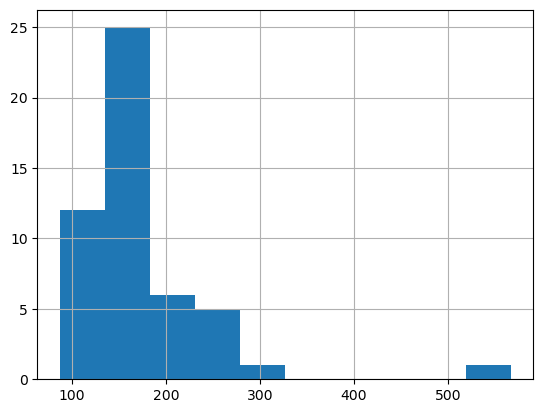

In [25]:
# I will check how prices are distributed
df["Sell"].hist(bins=10) 

In [27]:
# And find a correlation between the values
df.corr()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
Sell,1.000000,0.997433,0.879381,0.560425,0.335113,0.640059,-0.147343,0.168713,0.899339
"""List""",0.997433,1.000000,0.891618,0.570704,0.320470,0.640295,-0.130325,0.166838,0.906636
"""Living""",0.879381,0.891618,1.000000,0.750933,0.467277,0.668437,0.125075,0.177488,0.810243
"""Rooms""",0.560425,0.570704,0.750933,1.000000,0.656557,0.555187,0.371237,0.282448,0.516593
"""Beds""",0.335113,0.320470,0.467277,0.656557,1.000000,0.458682,0.141205,0.036832,0.313638
"""Baths""",0.640059,0.640295,0.668437,0.555187,0.458682,1.000000,-0.023063,0.301119,0.582622
"""Age""",-0.147343,-0.130325,0.125075,0.371237,0.141205,-0.023063,1.000000,0.303733,-0.189221
"""Acres""",0.168713,0.166838,0.177488,0.282448,0.036832,0.301119,0.303733,1.000000,0.059647
"""Taxes""",0.899339,0.906636,0.810243,0.516593,0.313638,0.582622,-0.189221,0.059647,1.000000


In [55]:
print(df.columns)



Index(['Sell', ' "List"', ' "Living"', ' "Rooms"', ' "Beds"', ' "Baths"',
       ' "Age"', ' "Acres"', ' "Taxes"'],
      dtype='object')


In [61]:
df.columns = df.columns.str.replace('"', '').str.strip()
print(df.columns)



Index(['Sell', 'List', 'Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres',
       'Taxes'],
      dtype='object')


In [66]:
import statsmodels.api as sm

X = df["Taxes"]  # Independent variable
Y = df["Sell"]   # Dependent variable

X = sm.add_constant(X)  
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           7.22e-19
Time:                        20:12:35   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.1

Based on the regression results, we can analyze whether Taxes is a good predictor for Sell (selling price):

R-squared Valu: This means 80.9% of the variation in selling price is explained by property taxes, which is a strong relationship.
P-value for Taxes: Since the p-value is very small, it means Taxes is a significant predictor of selling price.
Coefficient for Taxes: This means that for each additional unit increase in Taxes, the selling price increases by 0.0414 units, assuming all else stays the same.


In [68]:
X2 = df["Living"]  
Y = df["Sell"]  

X2 = sm.add_constant(X2)  
model2 = sm.OLS(Y, X2).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           4.39e-17
Time:                        20:12:39   Log-Likelihood:                -247.69
No. Observations:                  50   AIC:                             499.4
Df Residuals:                      48   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5531     13.579      0.630      0.5

Taxes Model: R-squared = 0.809, highly significant p-value (0.000), coefficient of 0.0414 (taxes slightly impact the selling price).
Living Model: R-squared = 0.773, highly significant p-value (0.000), coefficient of 7.6613 (living space has a bigger impact on selling price).
Overall, the Taxes model explains a bit more variance, while Living space has a larger direct effect on the selling price. The Living model also appears more stable.